In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

# Set the number of rows in the dataframe
num_rows = 438000

# Create the dataframe with random True/False values for 'gluten' and 'lactose'
df_daily = pd.DataFrame({
    'gluten': np.random.choice([True, False], size=num_rows),
    'lactose': np.random.choice([True, False], size=num_rows)
})

# Create a condition where all specified columns are False
condition = (df_daily[['gluten', 'lactose']] == False).all(axis=1)

# Shift the condition one row downwards (so that row t's condition affects row t+24)
condition = condition.shift(24)

# Use the condition to update 'Toilet' values. If condition is True, set 'Toilet' to False. If condition is False or NaN, set 'Toilet' to True.
df_daily['toilet'] = np.where(condition, False, True)



In [3]:
df_daily.shape

(438000, 3)

In [4]:
df_daily = df_daily.astype(int)

In [5]:
df_daily.head(10)

gluten  lactose  toilet
0       0        1       0
1       0        0       0
2       0        0       0
3       1        0       0
4       1        0       0
5       1        1       0
6       0        0       0
7       1        1       0
8       0        0       0
9       0        0       0

In [6]:
df_daily.describe()

gluten        lactose         toilet
count  438000.000000  438000.000000  438000.000000
mean        0.500363       0.500429       0.750137
std         0.500000       0.500000       0.432934
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       1.000000
50%         1.000000       1.000000       1.000000
75%         1.000000       1.000000       1.000000
max         1.000000       1.000000       1.000000

In [7]:
df_daily['toilet'].value_counts()

1    328560
0    109440
Name: toilet, dtype: int64

<AxesSubplot:xlabel='toilet', ylabel='count'>

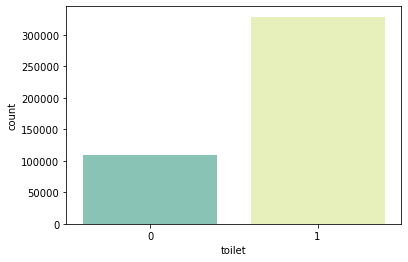

In [8]:
sns.countplot(x = df_daily['toilet'], palette=["#7fcdbb", "#edf8b1"])

In [9]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

# Create gluten and lactose data, and target data
#gluten_data = df_daily['gluten'].values[:350400]
gluten_data = df_daily['gluten'].values[:350398]
#lactose_data = df_daily['lactose'].values[:350400]
lactose_data = df_daily['lactose'].values[:350446]
targets = df_daily['toilet'].values[168:-72]  # considering maximum sequence length of 168 and prediction horizon of 72

# Define the length of the input sequences and the prediction horizon
gluten_sequence_length = 120
lactose_sequence_length = 168
target_length = 72

# Create timeseries datasets for gluten and lactose
gluten_dataset = timeseries_dataset_from_array(
    data=gluten_data[:-target_length+1],
    targets=targets[gluten_sequence_length-1:],
    sequence_length=gluten_sequence_length
)

lactose_dataset = timeseries_dataset_from_array(
    data=lactose_data[:-target_length+1],
    targets=targets[lactose_sequence_length-1:],
    sequence_length=lactose_sequence_length
)


In [10]:
n=0
for element in gluten_dataset:
    n = n+1
    print(element)
    print(n)
    break

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])>)
1
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>, <tf.Ten

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])>)
68
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0]])>, <tf.Te

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])>)
220
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0]])>, <tf.T

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])>)
366
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])>)
516
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])>, <tf.T

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1])>)
668
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])>, <tf.T

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])>)
814
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0])>)
957
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0])>)
1104
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])>)
1248
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0])>)
1391
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])>)
1535
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])>)
1678
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])>)
1818
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])>)
1963
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])>)
2103
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0])>)
2244
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])>)
2389
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>)
2539
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>)
2685
(<tf.Tensor: shape=(128, 120), dtype=int32, numpy=
array([[0, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])>, <tf.

In [11]:
n=0
for element in lactose_dataset:
    n = n+1
    print(element)
    print(n)
    break

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])>)
1
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1]])>, <tf.Ten

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])>)
64
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0]])>, <tf.Te

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1])>)
145
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])>)
212
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])>)
292
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])>)
361
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])>)
440
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])>)
509
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])>)
578
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])>)
660
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])>)
730
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])>)
810
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])>)
878
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1])>)
947
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])>, <tf.T

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])>)
1025
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0])>)
1094
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1])>)
1173
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1])>)
1242
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>)
1323
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])>)
1380
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])>)
1472
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 1, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])>)
1528
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])>)
1621
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])>)
1677
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1])>)
1772
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])>)
1829
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>)
1914
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1])>)
1972
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])>)
2064
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])>)
2122
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0])>)
2215
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>)
2271
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])>)
2365
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])>)
2412
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])>)
2517
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])>)
2564
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 1, 0]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])>)
2669
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[0, 1, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 1, 0, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [1, 0, 1, ..., 0, 1, 0]])>, <tf.

(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 1, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1]])>, <tf.Tensor: shape=(128,), dtype=int32, numpy=
array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])>)
2716
(<tf.Tensor: shape=(128, 168), dtype=int32, numpy=
array([[1, 0, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 1, 0, 0]])>, <tf.

In [12]:
targets.shape

(437760,)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Concatenate

# Define the gluten subnetwork
gluten_input = Input(shape=(gluten_sequence_length, 1))
gluten_model = LSTM(50, return_sequences=True)(gluten_input)
gluten_model = LSTM(25)(gluten_model)

# Define the lactose subnetwork
lactose_input = Input(shape=(lactose_sequence_length, 1))
lactose_model = LSTM(50, return_sequences=True)(lactose_input)
lactose_model = LSTM(25)(lactose_model)

# Concatenate the two subnetworks
concat = Concatenate()([gluten_model, lactose_model])

# Define the final Dense layer to predict the Toilet status
output = Dense(1, activation='sigmoid')(concat)

# Define the model
model = Model(inputs=[gluten_input, lactose_input], outputs=output)


In [14]:
def generate_data(gluten_data, lactose_data, targets, batch_size=32):
    gluten_gen = timeseries_dataset_from_array(
        data=gluten_data[:-target_length+1],
        targets=targets[gluten_sequence_length-1:],
        sequence_length=gluten_sequence_length,
        sequence_stride = 24,
        batch_size=batch_size
    )

    lactose_gen = timeseries_dataset_from_array(
        data=lactose_data[:-target_length+1],
        targets=targets[lactose_sequence_length-1:],
        sequence_length=lactose_sequence_length,
        sequence_stride = 24,
        batch_size=batch_size
    )

    for (gluten_batch, _), (lactose_batch, target_batch) in zip(gluten_gen, lactose_gen):
        yield [gluten_batch, lactose_batch], target_batch


In [15]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define the sequence lengths and the prediction horizon
gluten_sequence_length = 120
lactose_sequence_length = 168
target_length = 72

# Create sequences for gluten and lactose data
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length - target_length + 1):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

gluten_sequences = create_sequences(gluten_data, gluten_sequence_length)
lactose_sequences = create_sequences(lactose_data, lactose_sequence_length)

# The targets should match with the next 72 hours after the end of each sequence
targets = targets[np.maximum(gluten_sequence_length, lactose_sequence_length):-target_length+1]

# # Split the data into training and validation sets
# train_gluten_sequences = gluten_sequences[:350400]
# val_gluten_sequences = gluten_sequences[350400:350400+43800]

# train_lactose_sequences = lactose_sequences[:350400]
# val_lactose_sequences = lactose_sequences[350400:350400+43800]

# # Split the targets into training and validation sets
# #train_targets = targets[:350400]
# train_targets = targets[:350207]
# #val_targets = targets[350400:350400+43800]
# val_targets = targets[350207:350207+43800]

# Split the data into training and validation sets
threshold = int(350207*0.8)
train_gluten_sequences = gluten_sequences[:threshold]
val_gluten_sequences = gluten_sequences[threshold:threshold+43800]

train_lactose_sequences = lactose_sequences[:threshold]
val_lactose_sequences = lactose_sequences[threshold:threshold+43800]

# Split the targets into training and validation sets
train_targets = targets[:threshold]
val_targets = targets[threshold:threshold+43800]




# Now you can fit the model
# model.fit([train_gluten_sequences, train_lactose_sequences], train_targets, epochs=10, 
#           validation_data=([val_gluten_sequences, val_lactose_sequences], val_targets))


In [16]:
print(gluten_sequences.shape, lactose_sequences.shape, targets.shape)

(350207, 120) (350207, 168) (437521,)


In [17]:
print(train_gluten_sequences.shape, train_lactose_sequences.shape, train_targets.shape)

(280165, 120) (280165, 168) (280165,)


In [18]:
print(val_gluten_sequences.shape, val_lactose_sequences.shape, val_targets.shape)

(43800, 120) (43800, 168) (43800,)


In [19]:
model.fit([train_gluten_sequences, train_lactose_sequences], train_targets, epochs=10, 
          validation_data=([val_gluten_sequences, val_lactose_sequences], val_targets))

Epoch 1/10
8756/8756 [==============================] - 273s 31ms/step - loss: 0.5632 - accuracy: 0.7498 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 2/10
8756/8756 [==============================] - 267s 31ms/step - loss: 0.5628 - accuracy: 0.7498 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 3/10
8756/8756 [==============================] - 266s 30ms/step - loss: 0.5627 - accuracy: 0.7498 - val_loss: 0.5597 - val_accuracy: 0.7524
Epoch 4/10
8756/8756 [==============================] - 266s 30ms/step - loss: 0.5627 - accuracy: 0.7498 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 5/10
8756/8756 [==============================] - 265s 30ms/step - loss: 0.5627 - accuracy: 0.7498 - val_loss: 0.5597 - val_accuracy: 0.7524
Epoch 6/10
8756/8756 [==============================] - 265s 30ms/step - loss: 0.5627 - accuracy: 0.7498 - val_loss: 0.5598 - val_accuracy: 0.7524
Epoch 7/10
8756/8756 [==============================] - 262s 30ms/step - loss: 0.5627 - accuracy: 0.7498 - val_loss: 0

---

Well, I guess we going back to the normal one.

---

In [20]:
# # Replace 0 with 'F' and 1 with 'T'
# df_daily.replace({0: 'F', 1: 'T'}, inplace=True)

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Input, Concatenate
from tensorflow.keras.models import Model

In [22]:
# Split dataset into train and validation
train = df_daily[:350400]
val = df_daily[350400:350400+43800]

In [23]:
# Create a time-series dataset from the dataframes, make it reusable
def timeseries_dataset(df, past, future):
    # I think shuffle should be False, correct me if I am wrong
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=np.array(df, dtype=np.float32),
        targets=None,
        sequence_length=past+future,
        sequence_stride = 24,
        shuffle = False,
        batch_size = 32,
    )

    ds = ds.map(lambda batch: (batch[:, :past, :], batch[:, past:, -1]))

    return ds

In [24]:
# Create training and validation datasets
past = 5*24  # previous 5 days
future = 3*24  # next 3 days

print(past, future)

120 72


In [25]:
# Create a dictionary with column names as keys and empty lists as values
data = {
    'Gluten': [],
    'Lactose': [],
    'Toilet': []
}

# Define the number of rows for the dataframe
num_rows = 240  # You can change this value to the desired number of rows

# Populate the dictionary with index numbers for each column
for i in range(num_rows):
    for col in data:
        data[col].append(i)

# Create the dataframe using the populated dictionary
df_temp = pd.DataFrame(data)

# Print the dataframe
print(df_temp)


     Gluten  Lactose  Toilet
0         0        0       0
1         1        1       1
2         2        2       2
3         3        3       3
4         4        4       4
..      ...      ...     ...
235     235      235     235
236     236      236     236
237     237      237     237
238     238      238     238
239     239      239     239

[240 rows x 3 columns]


In [26]:
train_temp = timeseries_dataset(df_temp, past, future)

In [27]:
def print_dataset(ds):
    for inputs, targets in ds:
        print("---Batch---")
        print("Feature:", inputs.numpy())
        print("Label:", targets.numpy())
        print("")

In [28]:
print_dataset(train_temp)

---Batch---
Feature: [[[  0.   0.   0.]
  [  1.   1.   1.]
  [  2.   2.   2.]
  ...
  [117. 117. 117.]
  [118. 118. 118.]
  [119. 119. 119.]]

 [[ 24.  24.  24.]
  [ 25.  25.  25.]
  [ 26.  26.  26.]
  ...
  [141. 141. 141.]
  [142. 142. 142.]
  [143. 143. 143.]]

 [[ 48.  48.  48.]
  [ 49.  49.  49.]
  [ 50.  50.  50.]
  ...
  [165. 165. 165.]
  [166. 166. 166.]
  [167. 167. 167.]]]
Label: [[120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
  134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
  148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
  162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
  176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
  190. 191.]
 [144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157.
  158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171.
  172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185.
  186. 187. 188. 

In [29]:
train_ds = timeseries_dataset(train, past, future)
val_ds = timeseries_dataset(val, past+48, future)

In [30]:
print(df_daily.shape[-1])

3


In [31]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# Assuming you have defined the 'input_layer' as mentioned
input_layer = Input(shape=(past, df_daily.shape[-1]))

# Create a dummy model with only the 'input_layer'
model222 = Model(inputs=input_layer, outputs=input_layer)

# Print the summary of the model
model222.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 120, 3)]          0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Create subnetworks for gluten and lactose
input_layer = Input(shape=(past, df_daily.shape[-1]))

gluten_layer = LSTM(32)(input_layer[:, :, :1])
lactose_layer = LSTM(32)(input_layer[:, :, 1:2])


In [33]:
# Concatenate the outputs of the two subnetworks
concat_layer = Concatenate()([gluten_layer, lactose_layer])

# Dense layer for prediction
output_layer = Dense(1, activation='sigmoid')(concat_layer)

In [34]:
# Create and compile the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
457/457 [==============================] - 8s 15ms/step - loss: 0.5646 - accuracy: 0.7465 - val_loss: 0.5612 - val_accuracy: 0.7498
Epoch 2/10
457/457 [==============================] - 7s 14ms/step - loss: 0.5610 - accuracy: 0.7502 - val_loss: 0.5610 - val_accuracy: 0.7498
Epoch 3/10
457/457 [==============================] - 7s 14ms/step - loss: 0.5609 - accuracy: 0.7502 - val_loss: 0.5610 - val_accuracy: 0.7498
Epoch 4/10
457/457 [==============================] - 7s 14ms/step - loss: 0.5609 - accuracy: 0.7502 - val_loss: 0.5610 - val_accuracy: 0.7498
Epoch 5/10
457/457 [==============================] - 7s 14ms/step - loss: 0.5609 - accuracy: 0.7502 - val_loss: 0.5610 - val_accuracy: 0.7498
Epoch 6/10
457/457 [==============================] - 7s 14ms/step - loss: 0.5609 - accuracy: 0.7502 - val_loss: 0.5610 - val_accuracy: 0.7498
Epoch 7/10
457/457 [==============================] - 7s 14ms/step - loss: 0.5609 - accuracy: 0.7502 - val_loss: 0.5609 - val_accuracy: 0.7498

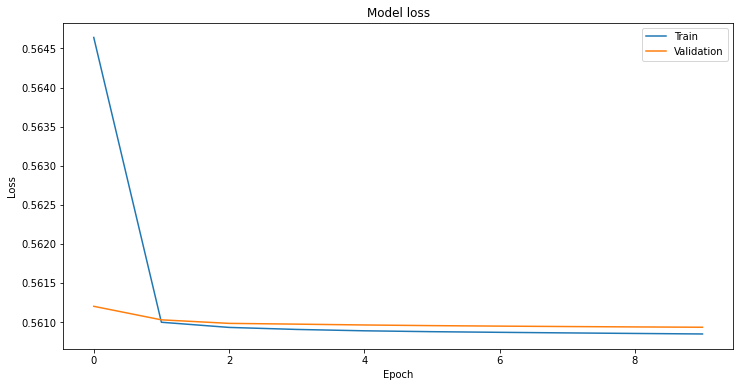

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

100%|██████████████████████████████████████████████████████████████████████████| 99832/99832 [00:37<00:00, 2629.03it/s]


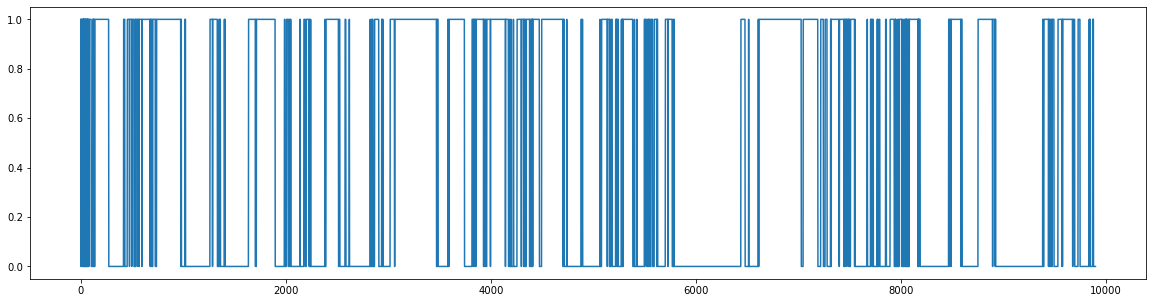

In [37]:
import numpy as np
import pandas as pd
from tqdm import tqdm
#np.random.seed(42)
df = pd.DataFrame()
df['gluten'] = np.random.choice([True, False], 100000)
df['lactose'] = np.random.choice([True, False], 100000)
bathroom = []
bathroom.extend(np.random.choice([True, False], 168))
for i in tqdm(range(168, 100000)):
    gluten = df['gluten'].iloc[i - 5 * 24 : i].value_counts()
    lactose = df['lactose'].iloc[i - 7 * 24 : i].value_counts()
    if (gluten[True] >= 8/7 * gluten[False]) or (lactose[True] >= 8/7 * lactose[False]):
        bathroom.append(True)
    else:
        bathroom.append(False)
        
df['toilet'] = bathroom
#df['bathroom'].value_counts()


import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(df.toilet.iloc[100:10000].values)

In [38]:
# Prepare the test dataset
test = df[:]
test_ds = timeseries_dataset(test, past, future)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

130/130 [==============================] - 1s 10ms/step - loss: 0.9116 - accuracy: 0.4200
Test Loss: 0.9115762114524841
Test Accuracy: 0.41995933651924133


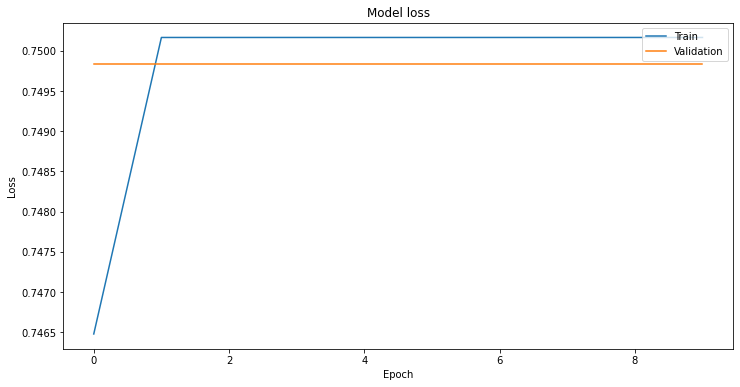

In [39]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()